# Step1: Preparing your proposal
## 1. Which client/dataset did you select and why?
Client 3: SportsStats (Olympics Dataset - 120 years of data)

Selected the dataset because the dataset is smaller than the others, and does not require a login for the dataset. 


## 2. Describe the steps you took to import and clean the data 
Imported pandas library to read the csv files, and to_sql() to store the data in MySQL dataset. 

In [3]:
pip install sqldf


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: /opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import sqldf

# pysqldf = lambda q: sqldf(q, globals())

athlete_df = pd.read_csv("athlete_events.csv")
noc_df = pd.read_csv("noc_regions.csv")

In [6]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
noc_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
summer_events = sqldf.run('''SELECT
                             ID,
                             Name,
                             Sex,
                             Age,
                             Height,
                             Weight,
                             NOC,
                             Year,
                             Sport,
                             Event,
                             Medal
                           FROM
                             athlete_df
                           WHERE
                             Season = "Summer"''')

winter_events = sqldf.run('''SELECT
                             ID,
                             Name,
                             Sex,
                             Age,
                             Height,
                             Weight,
                             NOC,
                             Year,
                             Sport,
                             Event,
                             Medal
                           FROM
                             athlete_df
                           WHERE
                             Season = "Winter"''')

In [15]:
summer_events.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,NED,1932,Athletics,Athletics Women's 100 metres,None


In [16]:
winter_events.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Event,Medal
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Speed Skating,Speed Skating Women's 500 metres,None
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Speed Skating,"Speed Skating Women's 1,000 metres",None
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992,Speed Skating,Speed Skating Women's 500 metres,None
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992,Speed Skating,"Speed Skating Women's 1,000 metres",None
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,NED,1994,Speed Skating,Speed Skating Women's 500 metres,None


## 3. Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at.

In [9]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [17]:
noc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


Out of 271116 records, there are 9474 null values for Age, 60171 null values for height and 62875 null values for weight. Since team names can be changed, we use NOC instead to be more consistent. 

## 4. Create an ERD or proposed ERD to show the relationships of the data you are exploring.

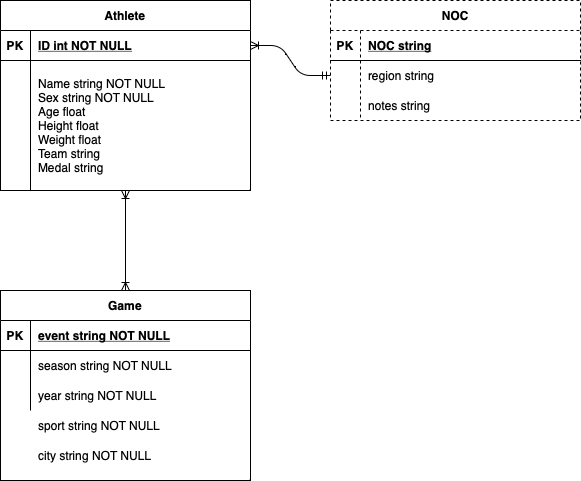

In [19]:
from IPython.display import Image
Image(filename = "sqlfordatascience.drawio.png", width = 400, height = 400)

# Step2: Develop project proposal
In this project, I would be comparing the data between Summer and Winter Olympic games. I will be finding the changes based on gender and diversity, and whether there are any correlation within the data. My audience might be those who are into Olympics statistics, or coaches who are analyzing their athletes games. 

## Questions
-  Q1. Is there any correlation between the performance of a country in winter olympics and that in summer olympics?
- Q2. Does country performance by year change more in Winter Olympics or Summer Olympics?
- Q3. How has the male:female ratio evolved through time?

## Hypothesis
- Q1. Yes
- Q2. Winter Olympics
- Q3. Decrease

## Approach
- A1. Heatmap
- A2. Calculate standard deviation in country performance through the years (Average standard deviation of Winter and Summer Olympics)
- A3. Histogram